In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import strftime
import os
%matplotlib inline

In [10]:
"""
Función que genera los mapas de temperatura mínima
"""
#%% fecha del pronostico
fechaPronostico = strftime("%Y-%m-%d")
variables = ["Rain","Tmax","Tmin","Tpro","Hr","Hrmin","Hrmax"]

LAT_MAX = 33.5791
LAT_MIN = 12.3782

LONG_MAX = -86.101
LONG_MIN = -118.236

#%% generate arrayFechas
# Generate Days
arrayFechas = []
tanio, tmes, tdia = fechaPronostico.split('-')
anio = int(tanio)
mes = int(tmes)
dia = int(tdia)

dirAnio = anio
dirMes = mes
dirDia = dia

#%% generate arrayFechas

for i in range(0,5,1):
    if i == 0:
        newDiaString = '{}'.format(dia)
        if len(newDiaString) == 1:
            newDiaString = '0' + newDiaString
        newMesString = '{}'.format(mes)
        if len(newMesString) == 1:
            newMesString = '0' + newMesString
        fecha = '{}'.format(anio)+"-"+newMesString+"-"+newDiaString
        arrayFechas.append(fecha)
    if i > 0:
        dia = dia + 1
        if mes == 2 and anio % 4 == 0:
            diaEnElMes = 29
        elif mes == 2 and anio % 4 != 0:
            diaEnElMes = 28
        elif mes == 1 or mes == 3 or mes == 5 or mes == 7 or mes == 8 or mes == 10 or mes == 12:
            diaEnElMes = 31
        elif mes == 4 or mes == 6 or mes == 9 or mes == 11:
            diaEnElMes = 30
        if dia > diaEnElMes:
            mes = mes + 1
            dia = 1
        if mes > 12:
            anio = anio + 1
            mes = 1
        newDiaString = '{}'.format(dia)
        if len(newDiaString) == 1:
            newDiaString = '0' + newDiaString
        newMesString = '{}'.format(mes)
        if len(newMesString) == 1:
            newMesString = '0' + newMesString
        fecha = '{}'.format(anio)+"-"+newMesString+"-"+newDiaString
        arrayFechas.append(fecha)

# path server
path = "/home/jorge/Documents/Research/generar_boletin"
# os.chdir("/home/jorge/Documents/work/autoPronosticoSonora")
os.chdir(path)

#%% read csvs
pathFile1 = '{}/data/{}/d1.txt'.format(path, fechaPronostico)
pathFile2 = '{}/data/{}/d2.txt'.format(path, fechaPronostico)
pathFile3 = '{}/data/{}/d3.txt'.format(path, fechaPronostico)
pathFile4 = '{}/data/{}/d4.txt'.format(path, fechaPronostico)
pathFile5 = '{}/data/{}/d5.txt'.format(path, fechaPronostico)

data1 = pd.read_table(pathFile1, sep=',')
data2 = pd.read_table(pathFile2, sep=',')
data3 = pd.read_table(pathFile3, sep=',')
data4 = pd.read_table(pathFile4, sep=',')
data5 = pd.read_table(pathFile5, sep=',')

cols = ["Long","Lat","Graupel","Hail","Rain","Tmax","Tmin","Tpro","Dpoint","Hr","Windpro","WindDir","Hrmin","Hrmax","TprSoil0_10","TprSoil10_40","WprSoil0_10","WprSoil10_40"]

data1.columns = cols
data2.columns = cols
data3.columns = cols
data4.columns = cols
data5.columns = cols

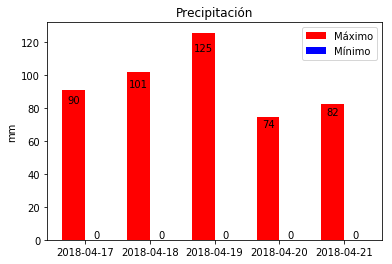

In [83]:
#%% make one dataFrame
variable = "Rain"
data = data1.filter(items=['Long', 'Lat'])
data['{}1'.format(variable)] = data1[variable]
data['{}2'.format(variable)] = data2[variable]
data['{}3'.format(variable)] = data3[variable]
data['{}4'.format(variable)] = data4[variable]
data['{}5'.format(variable)] = data5[variable]

#%% get values from Ags
data = data.loc[data['Lat'] >= LAT_MIN]
data = data.loc[data['Lat'] <= LAT_MAX]
data = data.loc[data['Long'] >= LONG_MIN]
data = data.loc[data['Long'] <= LONG_MAX]

y1 = []
y2 = []

for k in range(1,6):
    y1.append(data["Rain{}".format(k)].max())
    y2.append(data["Rain{}".format(k)].min())
    print()
    
ind = np.arange(5)
fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(ind, y1, width, color='r')
rects2 = ax.bar(ind + width, y2, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('mm')
ax.set_title('Precipitación')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(arrayFechas)

ax.legend((rects1[0], rects2[0]), ('Máximo', 'Mínimo'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .90*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


In [13]:
data.head()

,Long,Lat,Rain,Rain1,Rain2,Rain3,Rain4,Rain5
0,-118.236,12.3782,0.903,0.903,0.000,0.001,0.030,0.04
1,-118.109,12.3782,0.278,0.278,0.000,0.000,0.022,0.03
2,-117.981,12.3782,0.215,0.215,0.000,0.000,0.014,0.02
3,-117.854,12.3782,0.442,0.442,0.000,0.000,0.000,0.02
4,-117.726,12.3782,2.492,2.492,0.001,5.184,0.000,0.04


In [14]:
data.columns

Index(['Long', 'Lat', 'Rain', 'Rain1', 'Rain2', 'Rain3', 'Rain4', 'Rain5'], dtype='object')

Text(0.5,1,'Gráfica')

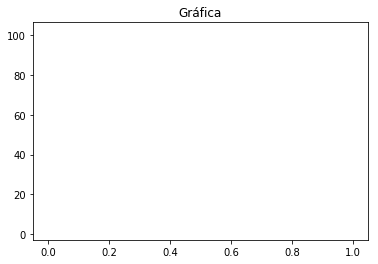

In [32]:
plt.plot(1, data["Rain1"].max(), 2, "r", data["Rain2"].max(), "b")
plt.title("Gráfica")

In [28]:
data["Rain1"].max()

90.7

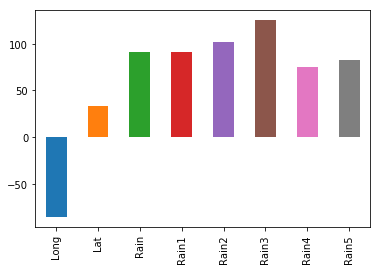

In [39]:
pd.Series(data.max()).plot.bar()